In [3]:
from PIL import Image

img = Image.open("bild3.jpg")
img = img.resize((round(img.size[0] / 5), round(img.size[1] / 5)), resample=Image.BICUBIC)

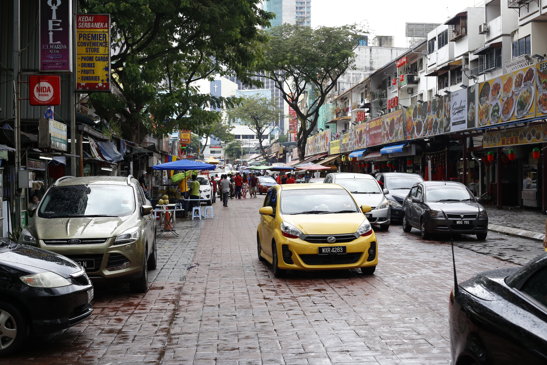

In [4]:
img

In [5]:
import keras.models as models

filename = "cardetector.h5"

model = models.load_model(filename)

/Users/jannisseemann/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageDraw

sizes = [200, 150, 100, 75]
step_size = 10

cars = [] 

for size in sizes:
    for x in range(0, img.size[0] - size, step_size):
        for y in range(0, img.size[1] - size, step_size):
            part = img.crop((x, y, x + size, y + size))
            data = np.asarray(part.resize((32, 32), resample=Image.BICUBIC))
            data = data.astype(np.float32) / 255.

            pred = model.predict(data.reshape(-1, 32, 32, 3))
            if pred[0][0] > 0.98:
                # print(pred[0][0])
                cars.append((x, y, size))

out = img.copy()
draw = ImageDraw.Draw(out)

cars_drawn = []

for car in cars:
    exists = False
    for car_drawn in cars_drawn:
        if car[0] >= car_drawn[0] and car[0] <= car_drawn[0] + car_drawn[2]:
            if car[1] >= car_drawn[1] and car[1] <= car_drawn[1] + car_drawn[2]:
                exists = True
                
    if exists == False:
        points = [
            (car[0], car[1]),
            (car[0], car[1] + car[2]),
            (car[0] + car[2], car[1] + car[2]),
            (car[0] + car[2], car[1]),
            (car[0], car[1])
        ]
        draw.line(points, "yellow", 5)
        cars_drawn.append(car)
        print(car)

(50, 110, 200)
(140, 100, 200)
(150, 80, 200)
(160, 70, 200)
(370, 160, 150)


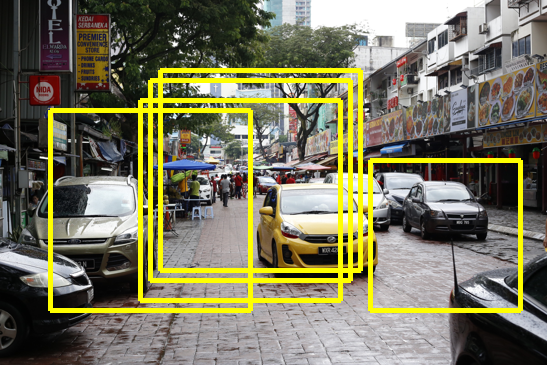

In [26]:
out